
----
# Cuaderno 12 - Comparación y evaluación de modelos
## Ariel Palazzesi - 2026
----

En esta oportunidad vamos a aplicar todo lo que aprendimos hasta ahora para **comparar distintos modelos de clasificación**, utilizando el mismo conjunto de datos.

Vamos a trabajar con modelos que ya conocemos:
- Regresión Logística
- K-Nearest Neighbors (KNN)
- Árbol de Decisión
- Random Forest

El objetivo es **evaluar cada modelo de forma justa y completa**, y tomar una decisión informada sobre cuál es el más apropiado según las métricas, el comportamiento frente a los datos y el problema que estemos resolviendo.


##
Carga del dataset

Usaremos nuevamente el dataset del Titanic, que ya conocemos.  
El objetivo será predecir si una persona sobrevivió (`Survived`) en base a variables como clase, edad, tarifa, cantidad de familiares a bordo, etc.

Primero cargamos el archivo y exploramos su contenido.


In [2]:
# Importamos las bibliotecas necesarias
import pandas as pd

# Cargamos el dataset CSV desde la carpeta de trabajo
df = pd.read_csv("Titanic-Dataset.csv")

# Mostramos las primeras filas del dataframe
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Preparación de los datos

Seleccionamos algunas variables numéricas que ya conocemos del dataset:

- `Pclass`: Clase del pasajero.
- `Age`: Edad.
- `SibSp`: Número de hermanos/esposas a bordo.
- `Parch`: Número de padres/hijos a bordo.
- `Fare`: Tarifa pagada por el pasaje.

La variable objetivo será `Survived`.

Vamos a eliminar las filas que tengan valores faltantes en estas columnas para simplificar el flujo de trabajo.


In [3]:
# Seleccionamos las columnas que vamos a usar
columnas = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']
df_filtrado = df[columnas].dropna()  # Eliminamos filas con valores nulos

# Separamos las variables predictoras (X) y la variable objetivo (y)
X = df_filtrado.drop('Survived', axis=1)
y = df_filtrado['Survived']

# Mostramos las dimensiones resultantes
X.shape, y.shape


((714, 5), (714,))

## División del dataset en entrenamiento y prueba

Dividimos el dataset en dos partes:
- El **80 %** se usará para entrenar y validar los modelos (con validación cruzada).
- El **20 % restante** se reservará para probar los modelos al final, simulando datos nunca vistos.

Esto nos permite evaluar si los modelos generalizan bien más allá de los datos con los que fueron entrenados.


In [4]:
from sklearn.model_selection import train_test_split

# Dividimos en entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificamos las dimensiones
X_train.shape, X_test.shape


((571, 5), (143, 5))

## Modelos a comparar

Vamos a trabajar con cuatro modelos conocidos, todos integrados en pipelines que incluyen escalado (`StandardScaler`):

1. Regresión Logística
2. K-Nearest Neighbors (KNN)
3. Árbol de Decisión
4. Random Forest

Para asegurarnos de que todos los modelos sean evaluados de forma justa, los entrenaremos y validaremos con los mismos datos, y usaremos validación cruzada para estimar su rendimiento promedio.


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Creamos un diccionario con los modelos y sus pipelines
modelos = {
    'Regresión Logística': Pipeline([
        ('escalado', StandardScaler()),
        ('modelo', LogisticRegression())
    ]),

    'KNN': Pipeline([
        ('escalado', StandardScaler()),
        ('modelo', KNeighborsClassifier())
    ]),

    'Árbol de Decisión': Pipeline([
        ('escalado', StandardScaler()),  # El escalado no es necesario, pero se mantiene por consistencia
        ('modelo', DecisionTreeClassifier(random_state=42))
    ]),

    'Random Forest': Pipeline([
        ('escalado', StandardScaler()),  # Tampoco es necesario, pero se mantiene por uniformidad
        ('modelo', RandomForestClassifier(random_state=42))
    ])
}


## Evaluación con validación cruzada

Vamos a evaluar todos los modelos utilizando validación cruzada con 5 folds.  
Calcularemos el **accuracy promedio** y la **desviación estándar** para cada uno.

Esto nos permitirá estimar la estabilidad y el rendimiento general de cada modelo al enfrentar distintos subconjuntos del dataset.


In [6]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Evaluamos cada modelo
resultados = {}

for nombre, pipeline in modelos.items():
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    resultados[nombre] = {
        'accuracy_promedio': np.mean(scores),
        'desviación': np.std(scores)
    }

# Mostramos resultados ordenados
for nombre, res in resultados.items():
    print(f"{nombre}:")
    print(f"  Accuracy promedio: {res['accuracy_promedio']:.4f}")
    print(f"  Desviación estándar: {res['desviación']:.4f}\n")


Regresión Logística:
  Accuracy promedio: 0.7039
  Desviación estándar: 0.0337

KNN:
  Accuracy promedio: 0.7128
  Desviación estándar: 0.0125

Árbol de Decisión:
  Accuracy promedio: 0.6410
  Desviación estándar: 0.0489

Random Forest:
  Accuracy promedio: 0.7145
  Desviación estándar: 0.0327



## Resultados de validación cruzada (accuracy)

Estos son los resultados promedio de cada modelo sobre el conjunto de entrenamiento usando validación cruzada con 5 folds:

- **Random Forest**: 71.45% (±3.27%)
- **KNN**: 71.28% (±1.25%)
- **Regresión Logística**: 70.39% (±3.34%)
- **Árbol de Decisión**: 64.10% (±4.89%)

Podemos ver que los tres primeros modelos tienen rendimientos similares, aunque el **Random Forest** tiene un ligero desempeño superior y buena estabilidad. El modelo de **Árbol de Decisión** fue el más débil en esta comparación inicial.

A continuación, elegiremos algunos modelos (por ejemplo, los dos mejores) para analizarlos más en detalle con matriz de confusión y curvas ROC.


## Evaluación en el conjunto de prueba

Luego de comparar el rendimiento promedio en validación cruzada, vamos a analizar más en detalle dos de los modelos con mejores resultados: **Random Forest** y **KNN**.

Para eso, entrenaremos cada uno sobre el conjunto completo de entrenamiento y evaluaremos su rendimiento con el conjunto de prueba, utilizando:

- Matriz de confusión
- Reporte de clasificación (`precision`, `recall`, `f1-score`)

Esto nos permitirá observar cómo se comportan en datos nunca vistos.


Random Forest – Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.71      0.82      0.76        87
           1       0.63      0.48      0.55        56

    accuracy                           0.69       143
   macro avg       0.67      0.65      0.65       143
weighted avg       0.68      0.69      0.68       143



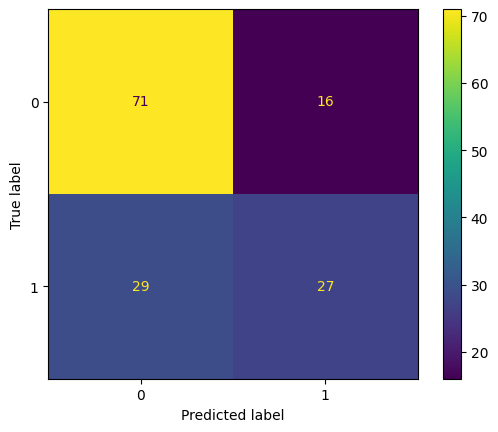

In [7]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Entrenamos y predecimos con Random Forest
modelo_rf = modelos['Random Forest']
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=modelo_rf.classes_)
disp_rf.plot()
print("Random Forest – Reporte de clasificación:\n")
print(classification_report(y_test, y_pred_rf))


## Análisis del modelo Random Forest

La evaluación del modelo Random Forest sobre el conjunto de prueba arrojó los siguientes resultados:

- **Accuracy global**: 69%
- **Precisión clase 0**: 0.71  **Recall clase 0**: 0.82
- **Precisión clase 1**: 0.63  **Recall clase 1**: 0.48

La matriz de confusión muestra que el modelo predice mejor a las personas que **no sobrevivieron**.  
Tiende a confundirse más al predecir casos positivos (personas que sí sobrevivieron), lo que podría ser una limitación importante en un contexto donde esa clase sea crítica.

En general, se trata de un modelo equilibrado, pero que podría beneficiarse de un ajuste o reponderación si la clase 1 fuese prioritaria.


KNN – Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.67      0.76      0.71        87
           1       0.53      0.43      0.48        56

    accuracy                           0.63       143
   macro avg       0.60      0.59      0.59       143
weighted avg       0.62      0.63      0.62       143



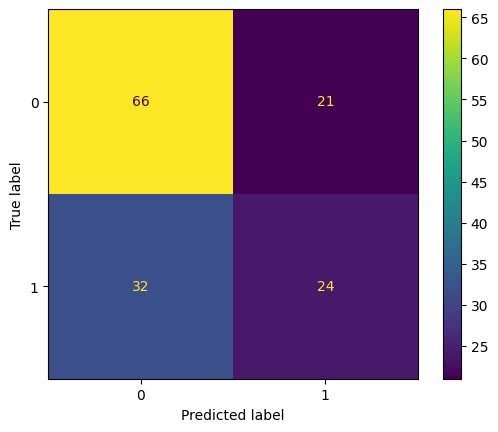

In [8]:
# Entrenamos y predecimos con KNN
modelo_knn = modelos['KNN']
modelo_knn.fit(X_train, y_train)
y_pred_knn = modelo_knn.predict(X_test)

# Matriz de confusión
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=modelo_knn.classes_)
disp_knn.plot()
print("KNN – Reporte de clasificación:\n")
print(classification_report(y_test, y_pred_knn))


## Análisis del modelo KNN

La evaluación del modelo KNN en el conjunto de prueba arrojó los siguientes resultados:

- **Accuracy global**: 63 %
- **Precisión clase 0**: 0.67 **Recall clase 0**: 0.76
- **Precisión clase 1**: 0.53 **Recall clase 1**: 0.43

El modelo tuvo un rendimiento algo inferior al de Random Forest. Se observan más errores al predecir la clase positiva (`Survived = 1`), con una caída en el recall y el F1-score para esa clase.

Esto indica que KNN, al menos con sus parámetros por defecto, tiene más dificultades para detectar correctamente los casos positivos, lo que puede ser un problema si la clase positiva tiene un peso importante en la decisión final.


## Curva ROC y AUC

Antes de seguir, veamos un poco de teoría.

En problemas de **clasificación binaria**, muchas veces una sola métrica como la *accuracy* no es suficiente para evaluar el desempeño de un modelo. Esto es especialmente cierto cuando las clases están desbalanceadas o cuando el costo de los errores es distinto según el tipo de fallo. En este contexto aparecen dos herramientas muy importantes: la **curva ROC** y el **AUC**.

---

### Probabilidades y umbrales de decisión

Muchos modelos de clasificación, como la **regresión logística** o Random Forest, no solo predicen una clase, sino que estiman una **probabilidad** de pertenecer a la clase positiva. A partir de esa probabilidad, el modelo decide la clase final usando un **umbral** (generalmente 0.5).

Cambiar ese umbral cambia el comportamiento del modelo:

* umbrales bajos hacen al modelo más “permisivo” (detecta más positivos),
* umbrales altos lo hacen más “estricto” (reduce falsos positivos, pero puede perder verdaderos positivos).

La curva ROC analiza precisamente cómo se comporta el modelo **para todos los umbrales posibles**, no solo para uno.

---

### Curva ROC

La **curva ROC** (*Receiver Operating Characteristic*) es un gráfico que muestra la relación entre:

* la **tasa de verdaderos positivos** (*True Positive Rate* o recall),
* y la **tasa de falsos positivos** (*False Positive Rate*),

a medida que se varía el umbral de decisión del clasificador.

Cada punto de la curva corresponde a un umbral distinto. Un modelo ideal logra una alta tasa de verdaderos positivos con una baja tasa de falsos positivos, por lo que su curva ROC se acerca al vértice superior izquierdo del gráfico.

Como referencia, una línea diagonal representa un clasificador que no distingue entre clases y actúa como una predicción aleatoria.

---

### AUC (Área bajo la curva)

El **AUC** (*Area Under the Curve*) es un valor numérico que resume la curva ROC en un solo número. Representa el área bajo la curva ROC y toma valores entre 0 y 1.

* Un **AUC = 0.5** indica que el modelo no discrimina mejor que el azar.
* Un **AUC cercano a 1** indica que el modelo separa muy bien las clases.
* Cuanto mayor es el AUC, mejor es la capacidad del modelo para distinguir entre la clase positiva y la negativa.

Una forma intuitiva de interpretarlo es:

> el AUC mide la probabilidad de que el modelo asigne una puntuación más alta a un ejemplo positivo que a uno negativo elegido al azar.

---

### Utilidad de ROC y AUC

La principal ventaja de la curva ROC y el AUC es que **no dependen de un único umbral de decisión**. Esto los hace muy útiles cuando:

* las clases están desbalanceadas,
* el umbral óptimo no está claro,
* o se quiere comparar clasificadores de forma más justa.

Por esta razón, ROC y AUC se utilizan mucho para **comparar modelos** y para evaluar clasificadores probabilísticos en contextos reales, como diagnóstico médico, detección de fraude o sistemas de recomendación.

---

### Curva ROC y AUC en scikit-learn

En scikit-learn, la curva ROC se construye a partir de las **probabilidades predichas** por el modelo (no de las clases finales), y el AUC se calcula directamente a partir de esa curva. Ambas herramientas se integran naturalmente con los modelos de clasificación y con técnicas como validación cruzada y GridSearchCV.


A continuación, generamos la curva ROC y calculamos el AUC para el modelo Random Forest.


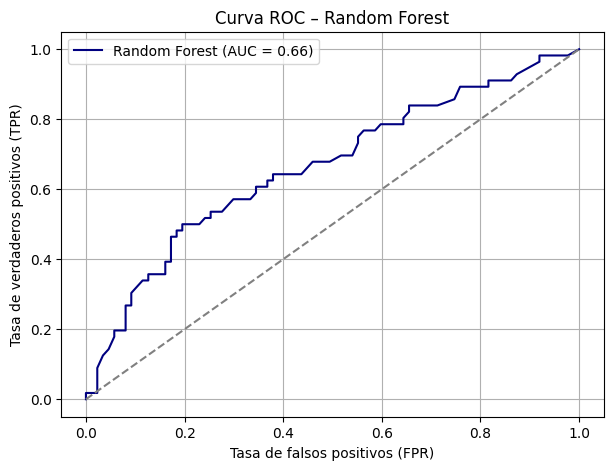

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilidades de clase positiva
y_proba_rf = modelo_rf.predict_proba(X_test)[:, 1]

# Curva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

# Gráfico
plt.figure(figsize=(7, 5))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", color='navy')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC – Random Forest')
plt.legend()
plt.grid(True)
plt.show()


## Interpretación de la curva ROC – Random Forest

El área bajo la curva (AUC) obtenida fue de **0.66**, lo que indica una capacidad moderada del modelo para discriminar entre ambas clases.

Aunque es mejor que un modelo aleatorio (AUC ≈ 0.5), todavía existe un margen importante de mejora. El modelo es capaz de aprovechar parcialmente las probabilidades para clasificar bien, pero aún confunde varios casos positivos y negativos.

Esta visualización complementa lo que vimos en la matriz de confusión: el modelo acierta más en la clase 0 que en la clase 1.


## Curva ROC y AUC – KNN

Repetimos el procedimiento anterior para evaluar el comportamiento del modelo KNN en distintos umbrales de clasificación.  
Esto nos ayudará a visualizar su capacidad real para distinguir entre clases cuando trabaja con probabilidades.


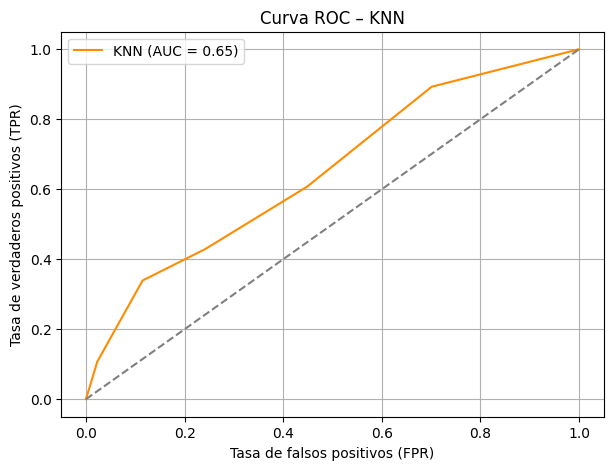

In [10]:
# Probabilidades de clase positiva
y_proba_knn = modelo_knn.predict_proba(X_test)[:, 1]

# Curva ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
auc_knn = roc_auc_score(y_test, y_proba_knn)

# Gráfico
plt.figure(figsize=(7, 5))
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC – KNN')
plt.legend()
plt.grid(True)
plt.show()


## Interpretación de la curva ROC – KNN

La curva ROC para el modelo KNN presenta un **AUC de 0.65**, apenas por debajo del obtenido por el modelo Random Forest.

Esto indica que, en términos generales, el modelo tiene una **capacidad moderada de clasificación**, similar a la de Random Forest cuando se lo evalúa según distintos umbrales.

La línea sigue una trayectoria cercana a la diagonal, lo que sugiere que el modelo aún tiene limitaciones para distinguir con claridad entre ambas clases, especialmente en contextos donde se requiere un alto recall o una baja tasa de falsos positivos.

Aunque no sobresale, su rendimiento es razonable considerando su simplicidad y baja complejidad computacional.


## Conclusión y cierre

En este cuaderno pusimos en práctica un proceso completo de comparación de modelos de clasificación.

Evaluamos cuatro algoritmos conocidos —Regresión Logística, KNN, Árbol de Decisión y Random Forest— utilizando técnicas rigurosas:

- **Validación cruzada** para estimar el rendimiento promedio y su variabilidad.
- **Matriz de confusión** y **reportes de clasificación** para entender cómo y dónde acierta o se equivoca cada modelo.
- **Curvas ROC y AUC** para analizar el desempeño en distintos umbrales de decisión, sin depender de un único punto de corte.

Vimos que modelos con similar accuracy pueden comportarse de forma muy distinta frente a clases desbalanceadas o casos difíciles de predecir. También observamos que el mejor modelo no siempre es el más complejo, y que elegir uno implica entender sus fortalezas, limitaciones y el contexto del problema.

Comparar modelos no es una cuestión de mirar un solo número, sino de aplicar criterio, herramientas y una mirada global sobre los datos y los objetivos.

En la próxima entrega daremos el siguiente paso: **trabajar con todo el pipeline completo**, desde la limpieza hasta la optimización de hiperparámetros, para preparar nuestro primer modelo "listo para producción".
